##Actividad: Algoritmo de clasificación de Bayes
**Karla González Sánchez | A01541526**

21 de Agosto de 2023

La base de datos `Social_Network_Ads.csv` contiene información acerca de las carácteristicas de los consumidores de un producto. Se utiliza la información de `edad`, `salario estimado` y `género` para realizar el algoritmo de clasificación de Bayes, se muestra la matriz de confusión y se hace un análisis de la presición del modelo para identificar las características de un cliente potencial.

Como primer paso, importamos las librerías necesarias para el análisis y creamos una estructura DataFrame para realizar la carga de datos con los que vamos a trabajar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estadistica/Social_Network_Ads.csv')

Obtenemos una vista preliminar de los datos para poder comprender su estructura y formato.

Donde en la columna "Purchased":
* 1 = Comprador
* 0 = No comprador



In [2]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Definimos las variables dependientes e independientes.
* x = Edad y Salario
* y = Comprador o no comprador (0, 1)

In [3]:
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

Separar al conjunto de entrenamiento del conjunto de pruebas.

In [4]:
#Conjunto de entrenamiento y conjunto de pruebas
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Dada la diferencia en escalas, lo que tenemos que hacer es estandarizar las escalas entre el conjunto de datos.

Lo que obtenemos es la actualización de las escalas para x_train y x_test.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Creación y entrenamiento del modelo para el algoritmo de Naive Bayes.

Se instancia un objeto de la clase `GaussianNB()` y se asigna a la variable `classifier`. Esto crea un clasificador Naive Bayes Gaussiano que se utilizará para `entrenar` y `realizar predicciones`.

Entrenar el clasificador: El método `fit(x_train, y_train)` se llama en el clasificador. Esto entrena el modelo utilizando los datos de entrenamiento x_train y las etiquetas correspondientes y_train. Durante el entrenamiento, el clasificador aprenderá las relaciones entre las características y las etiquetas en los datos de entrenamiento.

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [7]:
classifier.fit(x_train, y_train)

GaussianNB()

Llevamos a cabo la predicción del conjunto de pruebas.

Se tiene un modelo entrenado (classifier) que utiliza el algoritmo Naive Bayes Gaussiano para hacer predicciones basadas en las características proporcionadas.

`x_test` va a predecir los datos que pertenecen al grupo 1 o al grupo 0 y los comparamos con `y_test`.

In [8]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

Obtención de la matriz de confusión, con el objetivo de tener una visión detallada de cómo el modelo está realizando las predicciones en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, y poder evaluar su rendimiento.

`y_test:` Valores reales

`y_pred:` Elementos predecidos

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Del 100% de los elementos, a 7 que eran "1" (Compradores), los clasificó como "0" (No compradores), por lo cual, son falsos positivos.

Y 3 que eran "0" (No compradores), los clasificó como "1" (Compradores), por lo cual, son falsos negativos.

En este sentido, nuestro modelo que es de 100 elementos en total, tiene un 10% de error en la clasificación. Y tienes una eficiencia de del 90%

Text(0.5, 23.52222222222222, 'Prediccion')

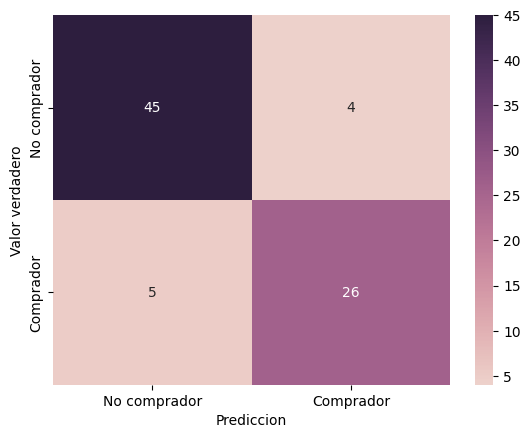

In [10]:
sns.heatmap(cm, annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
class_names = ['No comprador', 'Comprador']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

Al igual que en la interpretación de la matriz de confusión, el clasificador Naive Bayes Gaussiano está realizando predicciones correctas en aproximadamente el 90% de las instancias de prueba. En este modelo tenemos 10 errores contra 90 aciertos. Una de las cosas que se podrían hacer para mejorarlo, es hacerlo con mayor cantidad de datos para tener mayor presición en la parte del entrenamiento.

In [11]:
print("Exactitud del modelo", classifier.score(x_test, y_test))

Exactitud del modelo 0.8875


Conversión de la variable categórica `Gender` a forma numérica

In [12]:
dummies=pd.get_dummies(df['Gender'], prefix='Gender')

In [13]:
dummies

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [14]:
df=pd.concat([df,dummies], axis=1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [15]:
df.drop('Gender', axis=1, inplace=True)
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


Definimos las variables dependientes e independientes.
* x = Edad, Salario y Género
* y = Comprador o no comprador (0, 1)

In [16]:
x = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, 4].values

In [17]:
#Conjunto de entrenamiento y conjunto de pruebas
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [20]:
classifier.fit(x_train, y_train)

GaussianNB()

Llevamos a cabo la predicción del conjunto de pruebas.

Se tiene un modelo entrenado (classifier) que utiliza el algoritmo Naive Bayes Gaussiano para hacer predicciones basadas en las características proporcionadas.

`x_test` va a predecir los datos que pertenecen al grupo 1 o al grupo 0 y los comparamos con `y_test`.

In [21]:
y_pred = classifier.predict(x_test)


Obtención de la matriz de confusión, con el objetivo de tener una visión detallada de cómo el modelo está realizando las predicciones en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, y poder evaluar su rendimiento.

`y_test:` Valores reales

`y_pred:` Elementos predecidos

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Del 100% de los elementos, a 34 que eran "1" (Compradores), los clasificó como "0" (No compradores), por lo cual, son falsos positivos.

Y 16 que eran "0" (No compradores), los clasificó como "1" (Compradores), por lo cual, son falsos negativos.

En este sentido, nuestro modelo que es de 100 elementos en total, tiene un 50% de error en la clasificación. Y tienes una eficiencia de del 50%, eficacia muy por debajo del modelo anterior, donde únicamente estábamos considerando la edad y el salario estimado.

Text(0.5, 23.52222222222222, 'Prediccion')

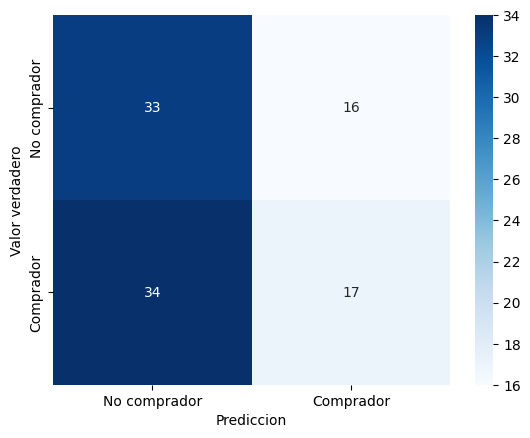

In [23]:
sns.heatmap(cm, annot = True, cmap="Blues")
class_names = ['No comprador', 'Comprador']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

En este modelo, observamos que se producen 50 predicciones incorrectas y 50 predicciones correctas. Esto sugiere que el género de una persona no parece tener una influencia significativa en la predicción de si realizará una compra de un producto en relación con su salario y edad.

In [24]:
print("Exactitud del modelo", classifier.score(x_test, y_test))

Exactitud del modelo 0.5


**Karla González Sánchez | A01541526**